In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading files
pca = pd.read_table("ALL.ldpruned.nohla.common.strict.all.eigenvec",sep=" ",header=None)
ped = pd.read_table("integrated_call_samples_v3.20130502.ALL.panel",sep="\t")

In [3]:
pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,HG00096,-0.011128,0.027264,0.011990,0.018794,0.002356,-0.003201,0.008686,0.000176,...,-0.018687,0.007624,0.018649,-0.003470,0.008474,0.006097,-0.013739,-0.007848,-0.001567,0.010679
1,0,HG00097,-0.010967,0.026845,0.010009,0.017414,-0.000596,-0.001368,0.004906,0.002100,...,-0.013492,-0.004778,0.021834,-0.003648,0.012539,0.000803,-0.002439,-0.007287,0.007260,0.014377
2,0,HG00099,-0.011385,0.027102,0.011619,0.016630,-0.000430,-0.001986,0.009197,0.000457,...,-0.009662,-0.001043,0.022380,-0.002425,0.012193,-0.001723,-0.009788,-0.009919,0.001823,0.012101
3,0,HG00100,-0.010576,0.026866,0.011531,0.018907,-0.000089,-0.004126,0.001630,0.000038,...,-0.033552,0.011379,0.021564,0.004170,0.016851,-0.004287,0.014259,-0.003427,-0.008815,0.007622
4,0,HG00101,-0.011146,0.026892,0.012338,0.017502,-0.002512,-0.000792,0.009011,0.004614,...,-0.023428,-0.002604,0.033893,0.001495,0.006810,0.000484,-0.012932,-0.003791,-0.004373,0.009797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,0,NA21137,-0.010670,0.007805,-0.036095,-0.015149,0.008398,0.005185,0.006778,-0.001146,...,-0.020018,-0.016008,0.017736,0.023206,-0.010671,0.001169,-0.013940,0.004871,0.010532,-0.000380
2500,0,NA21141,-0.010798,0.007496,-0.036504,-0.014277,0.011382,0.010259,0.014930,-0.003254,...,0.006009,-0.013117,0.007475,0.022275,-0.021417,0.003085,-0.003114,0.008964,0.008906,-0.012635
2501,0,NA21142,-0.010794,0.007550,-0.035479,-0.013171,0.008749,0.011287,0.015523,-0.003929,...,0.012719,-0.013658,0.018519,0.030761,-0.014393,-0.001081,-0.004552,0.014123,0.012908,-0.022885
2502,0,NA21143,-0.011015,0.007187,-0.036291,-0.013743,0.010807,0.009493,0.015274,-0.001374,...,0.014421,-0.013982,0.004234,0.030605,-0.017920,0.007811,0.001488,0.012712,0.004470,-0.018635


In [4]:
ped

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


In [5]:
#rename the columns since there is no header
pca = pca.rename(columns=dict([(1,"Individual ID")]+[(x,"PC"+str(x-1)) for x in range(2,22)]))


#merge
pcaped=pd.merge(pca,ped,right_on="sample",left_on="Individual ID",how="inner")

In [6]:
pcaped

,0,Individual ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC17,PC18,PC19,PC20,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,0,HG00096,-0.011128,0.027264,0.011990,0.018794,0.002356,-0.003201,0.008686,0.000176,...,-0.013739,-0.007848,-0.001567,0.010679,HG00096,GBR,EUR,male,NaN,NaN
1,0,HG00097,-0.010967,0.026845,0.010009,0.017414,-0.000596,-0.001368,0.004906,0.002100,...,-0.002439,-0.007287,0.007260,0.014377,HG00097,GBR,EUR,female,NaN,NaN
2,0,HG00099,-0.011385,0.027102,0.011619,0.016630,-0.000430,-0.001986,0.009197,0.000457,...,-0.009788,-0.009919,0.001823,0.012101,HG00099,GBR,EUR,female,NaN,NaN
3,0,HG00100,-0.010576,0.026866,0.011531,0.018907,-0.000089,-0.004126,0.001630,0.000038,...,0.014259,-0.003427,-0.008815,0.007622,HG00100,GBR,EUR,female,NaN,NaN
4,0,HG00101,-0.011146,0.026892,0.012338,0.017502,-0.002512,-0.000792,0.009011,0.004614,...,-0.012932,-0.003791,-0.004373,0.009797,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,0,NA21137,-0.010670,0.007805,-0.036095,-0.015149,0.008398,0.005185,0.006778,-0.001146,...,-0.013940,0.004871,0.010532,-0.000380,NA21137,GIH,SAS,female,NaN,NaN
2500,0,NA21141,-0.010798,0.007496,-0.036504,-0.014277,0.011382,0.010259,0.014930,-0.003254,...,-0.003114,0.008964,0.008906,-0.012635,NA21141,GIH,SAS,female,NaN,NaN
2501,0,NA21142,-0.010794,0.007550,-0.035479,-0.013171,0.008749,0.011287,0.015523,-0.003929,...,-0.004552,0.014123,0.012908,-0.022885,NA21142,GIH,SAS,female,NaN,NaN
2502,0,NA21143,-0.011015,0.007187,-0.036291,-0.013743,0.010807,0.009493,0.015274,-0.001374,...,0.001488,0.012712,0.004470,-0.018635,NA21143,GIH,SAS,female,NaN,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

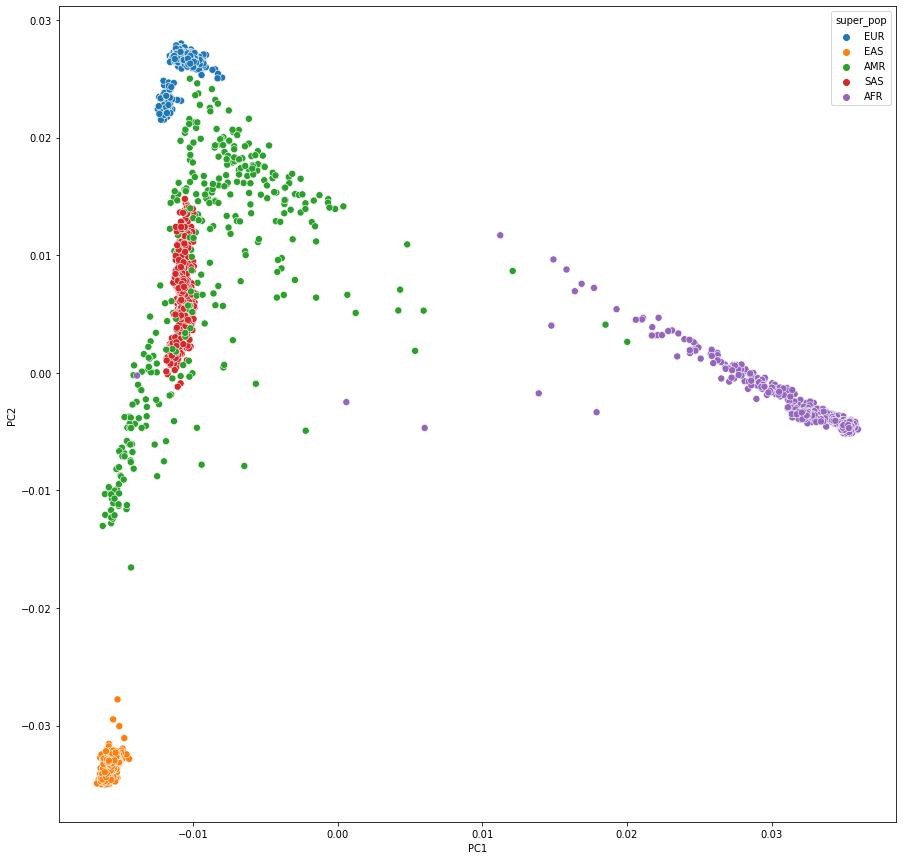

In [7]:
#plot
plt.figure(figsize=(15,15))
sns.scatterplot(data=pcaped,x="PC1",y="PC2",hue="super_pop",s=50)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

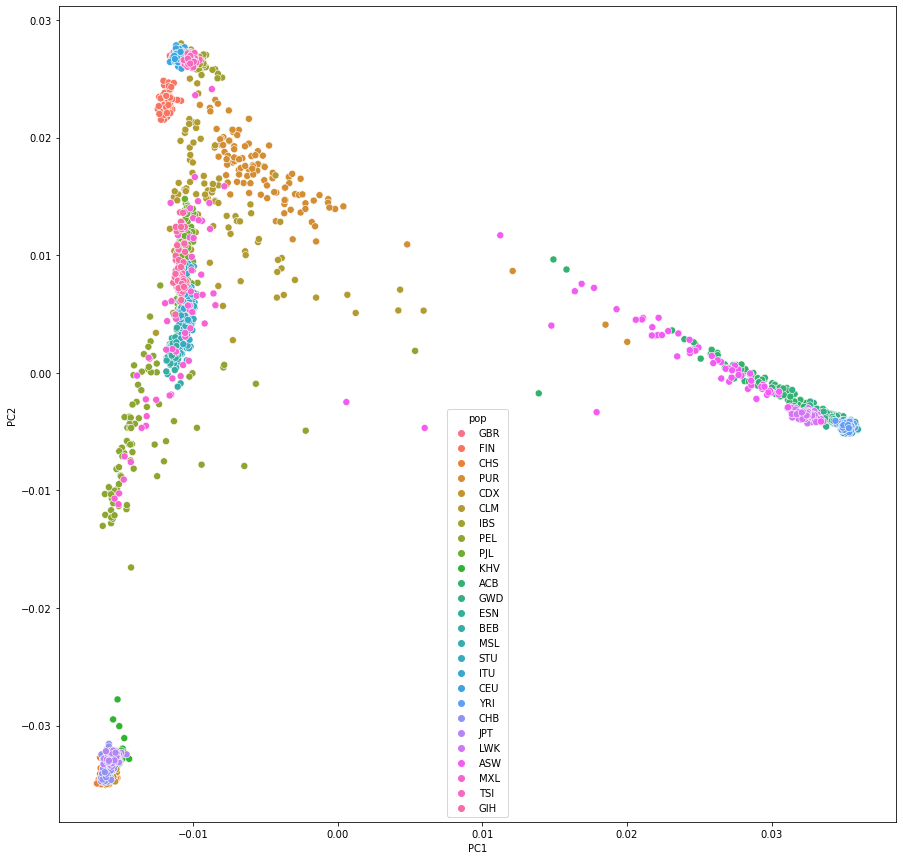

In [8]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=pcaped,x="PC1",y="PC2",hue="pop",s=50)

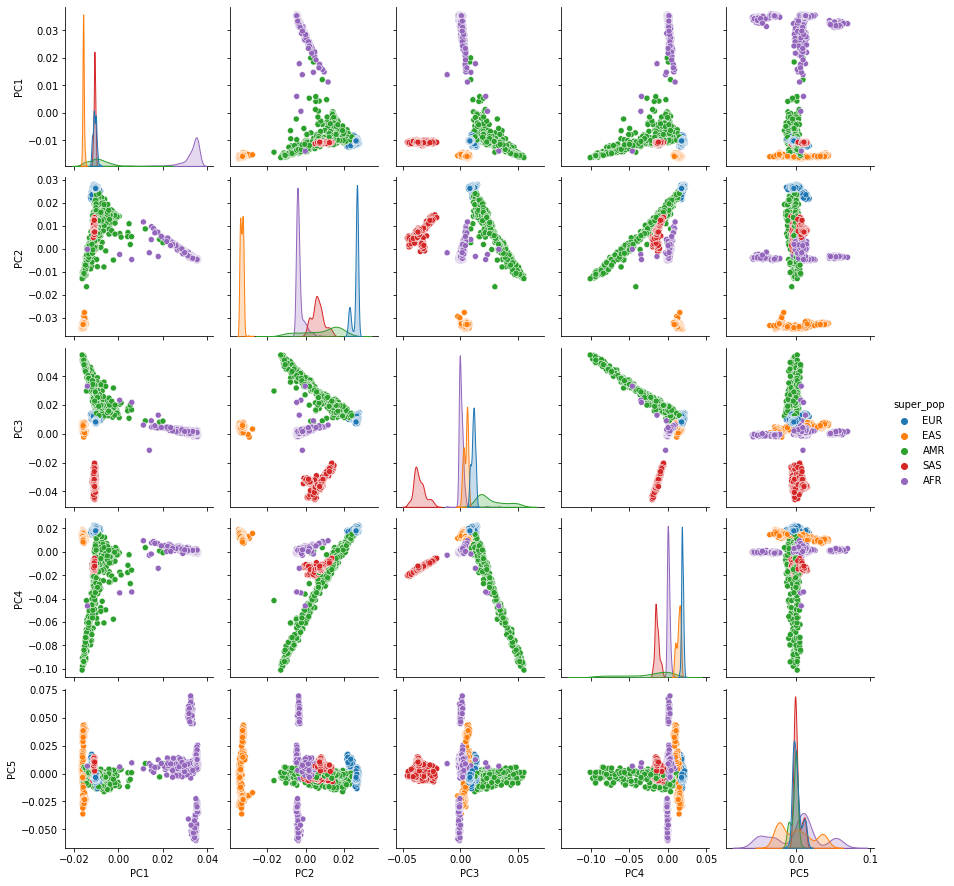

In [9]:
sns.pairplot(data=pcaped[["Individual ID","PC1","PC2","PC3","PC4","PC5","super_pop"]],hue="super_pop")